<a href="https://colab.research.google.com/github/chathungadulanjana/Handwritten_dettection_DLmodel/blob/main/Handwritten_dettection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten detection(using neural network)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
#Already image processing is successfulll. next we can begin the train,test split
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 Images

Test data = 10000 Images

Image dimentions --> 28 x 28

Grayscale Image --> 1 channel

In [ ]:
#printing the 10th image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


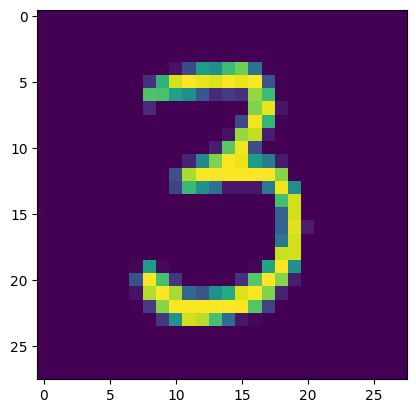

3


In [ ]:
#displaying the image

plt.imshow(x_train[50])
plt.show()

#print the corresponding the label
print(y_train[50])

IMage labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


Unit value in y train

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimentions in this dataset, If not, we have to resize all images to a common dimention

In [ ]:
#scaling the values
x_train= x_train/255
x_test=x_test/255

**Building the nural networks**

In [ ]:
#setting up the layers of the Neural networks
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid"),
])


In [ ]:
#compiling the nural network

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
#traning the nural network

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0331 - accuracy: 0.9888
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0254 - accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0178 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0162 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

Traning data acccuracy is more typycally 99%

Accuracy on test data

In [ ]:
loss,accuracy= model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.9746
0.9746000170707703


**test data acccuracy is typically 97%**

In [ ]:
print(x_test.shape)

(10000, 28, 28)


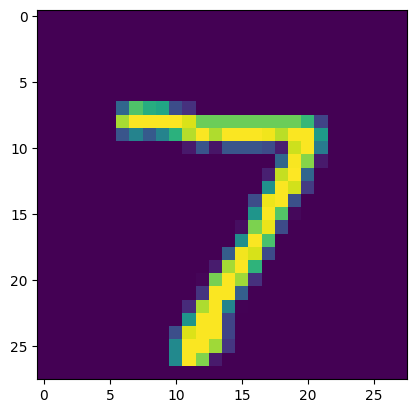

In [ ]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[4.2025746e-08 7.6837381e-03 5.0130446e-02 9.9464303e-01 2.2902324e-07
 1.1968623e-03 1.9202397e-16 9.9999988e-01 5.6829493e-02 8.0830896e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probabilities to class lebel

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels= [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 9, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

[[4.2025746e-08 7.6837381e-03 5.0130446e-02 ... 9.9999988e-01
  5.6829493e-02 8.0830896e-01]
 [4.8872124e-07 9.9877930e-01 1.0000000e+00 ... 9.2858030e-03
  5.4569057e-07 3.0149623e-09]
 [4.8530747e-08 9.9999851e-01 2.4809766e-01 ... 9.7382653e-01
  6.1046326e-01 9.9001434e-03]
 ...
 [2.5768350e-07 1.2911973e-04 3.4380288e-10 ... 3.6851171e-02
  7.9419522e-07 9.9546772e-01]
 [3.3944838e-07 7.9348128e-09 5.0233656e-10 ... 9.7687476e-11
  9.4340765e-01 1.1795927e-14]
 [6.5880395e-06 9.0023406e-08 1.5457409e-03 ... 1.8361329e-16
  8.7322816e-11 4.0276722e-05]]


y_test --> True labels

y_pred_labels --> Predicted Labels


Confusion matrix

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 971    0    1    2    1    1    2    0    1    1]
 [   0 1123    2    3    0    1    4    0    2    0]
 [   4   32  983    3    2    0    3    2    2    1]
 [   0    0    5  988    0   10    0    2    4    1]
 [   1    1    2    1  961    3    6    0    1    6]
 [   5    0    0   23    1  855    4    0    4    0]
 [   3    4    1    1    7    6  935    0    1    0]
 [   2    8   12   11    1    0    1  976    2   15]
 [   5    0    1   18    3    7    2    3  932    3]
 [   1    3    2    5   11    4    1    1    3  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

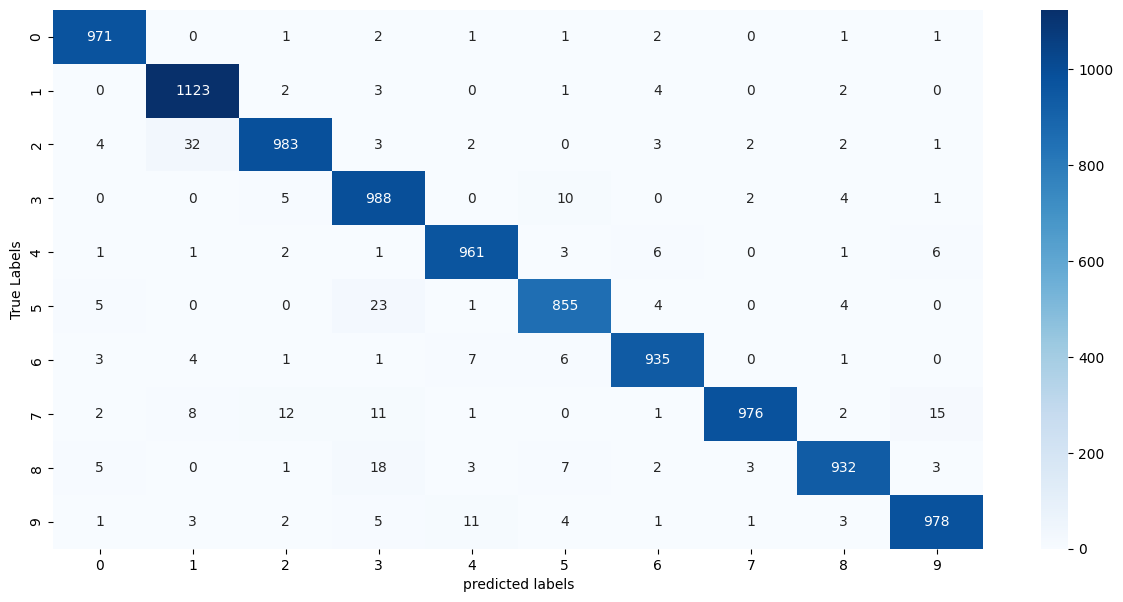

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt="d",cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("predicted labels")

Building a Predictive system

In [ ]:
input_image_path="/content/5.png"
input_image = cv2.imread(input_image_path)


In [ ]:
type(input_image)

numpy.ndarray

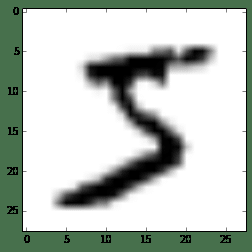

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(252, 252, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
print(grayscale)

[[97 97 97 ... 97 97 97]
 [97 97 97 ... 97 97 97]
 [97 97 97 ... 97 97 97]
 ...
 [97 97 97 ... 97 97 97]
 [97 97 97 ... 97 97 97]
 [97 97 97 ... 97 97 97]]


In [ ]:
grayscale.shape

(252, 252)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshape=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 94ms/step
[[1.2062462e-19 1.7186294e-05 1.0350645e-19 3.3036813e-01 3.8067999e-21
  1.0000000e+00 1.0000000e+00 8.1111304e-18 2.5618940e-29 1.0670733e-09]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

5


**Input system building**

Enter the path of the image to be predicted : /content/5.png


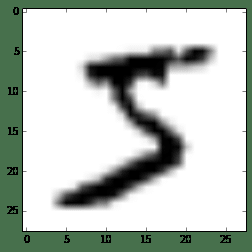

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognized as  5


In [ ]:
input_image_path=input("Enter the path of the image to be predicted : ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize=input_image_resize/255

image_reshape=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognized as ",input_pred_label)
